In [1]:
from pprint import pprint

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

from matplotlib import pyplot as plt
%matplotlib inline

# Prepare the dataset

In [2]:
covid_dataset = pd.read_csv('./covid_survey.csv')
covid_dataset.head()

,Timestamp,Country,STATE,CITY,Are you above 18 Years of Age.,EYE PAIN,CHEST PAIN,SOAR THROAT,STUFFY/RUNNY NOSE,WEAKNESS FATIGUE,Aches/ Muscle Pain,Headache,Cough,Difficulty in Breathing,Change in Sleep Cycle,Do you personally know anyone in your local community who is ill with a fever and either a cough or difficulty breathing?,For how many days have you had at least one of these symptoms?,Have you ever been tested for coronavirus (COVID-19)?,Have you been tested for coronavirus (COVID-19) in the last 14 days?,"If you have been tested, did this test find that you had coronavirus (COVID-19)?",Did you have to pay anything for this test yourself?,"If a vaccine to prevent COVID-19 was offered to you today, would you choose to be vaccinated?",Would you be more likely or less likely to have a COVID-19 vaccination if it was recommended to you by each of the following: [WHO],Would you be more likely or less likely to have a COVID-19 vaccination if it was recommended to you by each of the following: [Politicians],Would you be more likely or less likely to have a COVID-19 vaccination if it was recommended to you by each of the following: [Government Health Officials],Would you be more likely or less likely to have a COVID-19 vaccination if it was recommended to you by each of the following: [Doctors & Healthcare Staff ],"Would you be more likely or less likely to have a COVID-19 vaccination if it was recommended to you by each of the following: [Friends and Fa,ily]",How concerned are you that you would experience a side effect from a COVID-19 vaccination?,HAVE YOU EVER BEEN SUFFERED WITH THE BELOW MENTIONED DISEASES (OR) ARE YOU SUFFURING FROM ANY OF THE DISEASES BELOW.,"In the last 24 hours, have you done any of the following? [Have gone to work outside that place where you live]","In the last 24 hours, have you done any of the following? [Gone to Supermarket or Pharmacy]","In the last 24 hours, have you done any of the following? [Gone to Restaurant/CAFE/Shopping Center]","In the last 24 hours, have you done any of the following? [Spent time with someone who is currently not staying with you.]","In the last 24 hours, have you done any of the following? [Attended public meet with more than 10 people]","In the last 24 hours, have you done any of the following? [You were present in the crowded place of more than 7 people]","In the last 24 hours, have you done any of the following? [Have used Public Transport]","In the last 24 hours, have you done any of the following? [You were at Home.]","In the last 24 hours, have you done any of the following? [None of the above]","In last 24 Hours When Ever you stepped outside your personal premises, How often have you used mask/face cover.",How often are you intentionally avoiding contact with other people?,GENDER,DO YOU SMOKE ?,ALCHOHOL CONSUMPTION,Do you access to Sanitizer/Hand wash at workplace,Do you access to Sanitizer/Hand wash at Home,AGE BAND
0,4/6/2021 0:48:07,INDIA,TELANGANA,HYDERABAD,Yes,YES,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,10,No,No,No,No,"Yes, Definitely",More Likely,Less Likely,Less Likely,More Likely,Less Likely,Moderately Concerned,"HIGH BLOOD PRESSURE, OBESITY, WEEKEND IMMUNE SYSTEM",YES,YES,YES,NO,NO,YES,NO,YES,NO,Sometimes,None of the time,Male,No,SOCIALLY,No,Yes,26-32
1,4/6/2021 15:31:21,INDIA,TELANGANA,HYDERABAD,Yes,YES,Yes,No,Yes,Yes,No,No,Yes,Yes,Yes,No,09,No,No,Yes,No,"Yes, Probably",More Likely,Less Likely,Less Likely,More Likely,More Likely,Moderately Concerned,"ASTHAMA, HIGH BLOOD PRESSURE",YES,NO,NO,YES,YES,YES,NO,YES,NO,Often,None of the time,Male,No,SOCIALLY,Yes,Yes,26-32
2,4/19/2021 12:06:03,INDIA,TELANGANA,HYDERABAD,Yes,NO,No,No,Yes,No,No,No,No,No,No,No,nil,No,No,No,No,"Yes, Definitely",More Likely,Less Likely,Less Likely,More Likely,More Likely,Not at all Concerned,NONE OF THE ABOVE,NO,YES,YES,NO,NO,NO,NO,YES,NO,Always,Most of the time,Male,No,SOCIALLY,Yes,Yes,41-45
3,4/19/2021 12:29:41,INDIA,TELANGANA,HYDERABAD,Yes,NO,No,No,No,No,No,No,No,No,No,Maybe,0,No,No,No,No

## If a vaccine to prevent COVID-19 was offered to you today, would you choose to be vaccinated?

In [3]:
col = 'If a vaccine to prevent COVID-19 was offered to you today, would you choose to be vaccinated?'

In [4]:
covid_dataset[col].value_counts()

Yes, Definitely       96
Yes, Probably         79
No, Probably Not      34
No, Definitely Not    18
Name: If a vaccine to prevent COVID-19 was offered to you today, would you choose to be vaccinated?, dtype: int64

In [5]:
replacement_dict = {
    'Yes, Definitely': 'Yes',
    'Yes, Probably': 'No',
    'No, Probably Not': 'No',
    'No, Definitely Not': 'No'
}

dataset_rep = covid_dataset.copy()
dataset_rep[col] = covid_dataset[col].apply(lambda x: replacement_dict[x])
dataset_rep[col].value_counts()

No     131
Yes     96
Name: If a vaccine to prevent COVID-19 was offered to you today, would you choose to be vaccinated?, dtype: int64

## Recommendations

In [6]:
cols_to_remove = [col for col in dataset_rep.columns if col.startswith('Would you be more likely or less likely to have a COVID-19 vaccination if it was recommended to you by each of the following:')]
cols_to_remove += ['How concerned are you that you would experience a side effect from a COVID-19 vaccination?']

pprint(cols_to_remove)

['Would you be more likely or less likely to have a COVID-19 vaccination if it '
 'was recommended to you by each of the following: [WHO]',
 'Would you be more likely or less likely to have a COVID-19 vaccination if it '
 'was recommended to you by each of the following: [Politicians]',
 'Would you be more likely or less likely to have a COVID-19 vaccination if it '
 'was recommended to you by each of the following: [Government Health '
 'Officials]',
 'Would you be more likely or less likely to have a COVID-19 vaccination if it '
 'was recommended to you by each of the following: [Doctors & Healthcare Staff '
 ']',
 'Would you be more likely or less likely to have a COVID-19 vaccination if it '
 'was recommended to you by each of the following: [Friends and Fa,ily]',
 'How concerned are you that you would experience a side effect from a '
 'COVID-19 vaccination?']


In [7]:
dataset_rem = dataset_rep.drop(cols_to_remove, axis=1)

## Irrelevant columns

In [8]:
dataset_rem['Timestamp']

0        4/6/2021 0:48:07
1       4/6/2021 15:31:21
2      4/19/2021 12:06:03
3      4/19/2021 12:29:41
4      4/19/2021 12:34:24
              ...        
222    4/21/2021 13:33:25
223    4/21/2021 14:47:59
224    4/22/2021 10:13:11
225    4/22/2021 11:04:47
226    4/22/2021 11:10:36
Name: Timestamp, Length: 227, dtype: object

In [9]:
cols_to_remove = [col for col in dataset_rem.columns if len(dataset_rem[col].value_counts()) == 1]
cols_to_remove += ['Timestamp']

pprint(cols_to_remove)

['Country', 'STATE', 'Timestamp']


In [10]:
dataset_irr = dataset_rem.drop(cols_to_remove, axis=1)

## Age anomalies

In [11]:
col1 = 'Are you above 18 Years of Age. '
col2 = 'AGE BAND'

dataset_irr.loc[dataset_irr[col1] == 'No'][[col1, col2]]

,Are you above 18 Years of Age.,AGE BAND
70,No,18-25
176,No,18-25


In [12]:
dataset_age = dataset_irr.copy()
dataset_age[col2] = dataset_irr.apply(lambda x: '<18' if x[col1] == 'No' else x[col2], axis=1)
dataset_age.loc[dataset_age[col1] == 'No'][[col1, col2]]

dataset_age.drop([col1], inplace=True, axis=1)

## Transform to lowercase

In [13]:
dataset_low = dataset_age.copy()
for col in dataset_low.columns:
    dataset_low[col] = dataset_low[col].str.lower()

## nan

In [14]:
dataset_nan = dataset_low.copy()
for col in dataset_nan.columns:
    most_common = dataset_nan[col].value_counts().keys()[0]
    dataset_nan[col].fillna(most_common, inplace=True)

## Transform to numbers

In [15]:
dataset_num = dataset_nan.copy()
categories_dict = {}

for col in dataset_num.columns:
    vals = sorted(list(dataset_num[col].value_counts(dropna=False).keys()))
    cat_num = {val: i for i, val in enumerate(vals)}
    dataset_num[col] = dataset_num.apply(lambda x: cat_num[x[col]], axis=1)
    categories_dict[col] = {i: str(val) for i, val in enumerate(vals)}

## Final dataset

In [16]:
col = 'If a vaccine to prevent COVID-19 was offered to you today, would you choose to be vaccinated?'
final_X = dataset_num.drop([col], axis=1)
# no - positive (True), yes - negative (False)
final_y = dataset_num[col].apply(lambda x: False if x == 1 else True)

In [17]:
print(f'n_columns: {len(covid_dataset.columns)} -> {len(final_X.columns)}')
final_X.head()

n_columns: 46 -> 35


,CITY,EYE PAIN,CHEST PAIN,SOAR THROAT,STUFFY/RUNNY NOSE,WEAKNESS FATIGUE,Aches/ Muscle Pain,Headache,Cough,Difficulty in Breathing,Change in Sleep Cycle,Do you personally know anyone in your local community who is ill with a fever and either a cough or difficulty breathing?,For how many days have you had at least one of these symptoms?,Have you ever been tested for coronavirus (COVID-19)?,Have you been tested for coronavirus (COVID-19) in the last 14 days?,"If you have been tested, did this test find that you had coronavirus (COVID-19)?",Did you have to pay anything for this test yourself?,HAVE YOU EVER BEEN SUFFERED WITH THE BELOW MENTIONED DISEASES (OR) ARE YOU SUFFURING FROM ANY OF THE DISEASES BELOW.,"In the last 24 hours, have you done any of the following? [Have gone to work outside that place where you live]","In the last 24 hours, have you done any of the following? [Gone to Supermarket or Pharmacy]","In the last 24 hours, have you done any of the following? [Gone to Restaurant/CAFE/Shopping Center]","In the last 24 hours, have you done any of the following? [Spent time with someone who is currently not staying with you.]","In the last 24 hours, have you done any of the following? [Attended public meet with more than 10 people]","In the last 24 hours, have you done any of the following? [You were present in the crowded place of more than 7 people]","In the last 24 hours, have you done any of the following? [Have used Public Transport]","In the last 24 hours, have you done any of the following? [You were at Home.]","In the last 24 hours, have you done any of the following? [None of the above]","In last 24 Hours When Ever you stepped outside your personal premises, How often have you used mask/face cover.",How often are you intentionally avoiding contact with other people?,GENDER,DO YOU SMOKE ?,ALCHOHOL CONSUMPTION,Do you access to Sanitizer/Hand wash at workplace,Do you access to Sanitizer/Hand wash at Home,AGE BAND
0,0,1,1,0,0,0,0,0,1,1,1,2,7,0,0,0,0,6,1,1,1,0,0,1,0,1,0,4,2,1,0,2,1,2,1
1,0,1,1,0,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,1,1,0,1,0,2,2,1,0,2,2,2,1
2,0,0,0,0,1,0,0,0,0,0,0,1,58,0,0,0,0,7,0,1,1,0,0,0,0,1,0,0,1,1,0,2,2,2,3
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0
4,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,4,1,0,0,2,2,0


## Auxilary constants

In [18]:
N_COLUMNS = len(final_X.columns)

# Metric

In [19]:
# cols = final_X.columns
# col = cols[2]
# print(col)
# print('--------')
# print(sorted(final_X[col].value_counts().keys()))
# final_X[col].value_counts()

In [20]:
cols = final_X.columns

def get_val_indices(values_arr, match_only_one=False):
    for val in values_arr[:-1]:
        print(f'{val} / ', end='')
    if not match_only_one:
        print(f'{values_arr[-1]}:')
    else:
        print(f'{values_arr[-1]} / ...:')
    
    values_arr = set(values_arr)
    result = []
    print(values_arr)
    for i, col in enumerate(cols):
        vals = set([categories_dict[col][x] for x in list(final_X[col].value_counts().keys())])
        if vals == values_arr or (match_only_one and set(vals) & set(values_arr)):
            result += [i]
            print(i, end=',')
    print('\n========================================')
    return result

In [21]:
values_categories_arr = [
    ['no', 'yes'],
    ['maybe', 'no', 'yes'],
    ['always', 'never', 'often', 'rarely', 'sometimes'],
    ['all the time', 'most of the time', 'none of the time', 'option 2', 'some of the time'],
    ['female', 'male', 'prefer not to say'],
    ['never', 'one or twice1 a week', 'socially'],  # alco
    ['<18', '18-25', '26-32', '33-40', '41-45', '46-55', '>60'],
    ['hyderabad'],  # city
    ['weekend immune system'],  # diseases
    ['no symptoms']  # symptoms
]

match_only_one_idx = [7, 8, 9]

In [22]:
values_indices_arr = []
for i, vals in enumerate(values_categories_arr):
    values_indices_arr += [get_val_indices(vals, i in match_only_one_idx)]

print('Have all the columns been found?', sorted([x for vals in values_indices_arr for x in vals]) == list(range(0, N_COLUMNS)))

no / yes:
{'no', 'yes'}
1,2,3,4,5,6,7,8,9,10,13,14,15,16,18,19,20,21,22,23,24,25,26,30,
maybe / no / yes:
{'no', 'yes', 'maybe'}
11,32,33,
always / never / often / rarely / sometimes:
{'often', 'always', 'never', 'rarely', 'sometimes'}
27,
all the time / most of the time / none of the time / option 2 / some of the time:
{'some of the time', 'option 2', 'all the time', 'none of the time', 'most of the time'}
28,
female / male / prefer not to say:
{'male', 'female', 'prefer not to say'}
29,
never / one or twice1 a week / socially:
{'never', 'one or twice1 a week', 'socially'}
31,
<18 / 18-25 / 26-32 / 33-40 / 41-45 / 46-55 / >60:
{'46-55', '26-32', '<18', '33-40', '>60', '41-45', '18-25'}
34,
hyderabad / ...:
{'hyderabad'}
0,
weekend immune system / ...:
{'weekend immune system'}
17,
no symptoms / ...:
{'no symptoms'}
12,
Have all the columns been found? True


In [23]:
def covert_dict_to_num(d):
    keys = sorted(list(d.keys()))
    result = dict()
    for i, key in enumerate(keys):
        result[i] = d[key]
    return result

In [24]:
no_yes_val_dict = covert_dict_to_num({'no': 0., 'yes': 1.})
def no_yes_dist(a, b):
    return abs(no_yes_val_dict[a] - no_yes_val_dict[b])

no_maybe_yes_val_dict = covert_dict_to_num({'no': 0., 'maybe': 0.5, 'yes': 1.})
def no_maybe_yes_dist(a, b):
    return abs(no_maybe_yes_val_dict[a] - no_maybe_yes_val_dict[b])

freq_val_dict = covert_dict_to_num({'never': 0., 'rarely': 0.25, 'sometimes': 0.5, 'often': 0.75, 'always': 1.})
def freq_dist(a, b):
    return abs(freq_val_dict[a] - freq_val_dict[b])

freq_time_val_dict = covert_dict_to_num(
    {'none of the time': 0., 'some of the time': 0.33, 'most of the time': 0.67, 'all the time': 1., 'option 2': -1})
def freq_time_dist(a, b):  # What is "option 2"?
    a = freq_time_val_dict[a]
    b = freq_time_val_dict[b]
    if a == -1 or b == -1:  # option 2
        return 0.
    return abs(a - b)

gender_val_dict = covert_dict_to_num({'female': 0., 'male': 1., 'prefer not to say': -1})
def gender_dist(a, b):
    a = gender_val_dict[a]
    b = gender_val_dict[b]
    if a == -1 or b == -1:  # prefer not to say
        return 0.
    else:
        return abs(a - b)

alco_freq_val_dict = covert_dict_to_num({'never': 0., 'socially': 0.5, 'one or twice1 a week': 1.})
def alco_freq_dist(a, b):
    return abs(alco_freq_val_dict[a] - alco_freq_val_dict[b])

age_val_dict = covert_dict_to_num(
    {'<18': 0., '18-25': 0.17, '26-32': 0.33, '33-40': 0.5, '41-45': 0.67, '46-55': 0.83, '>60': 1.})
def age_dist(a, b):
    return abs(age_val_dict[a] - age_val_dict[b])

def city_dist(a, b):
    return 0. if a == b else 1.

def diseases_dist(a, b):
    if (a == 'None of the above') ^ (b == 'None of the above'):
        return 1.
    else:
        return 0.

# 0: 0; 1: 0.05; 2: 0.1, ...
symptoms_val_dict = covert_dict_to_num({'0': 0.0, '09': 0.45, '1': 0.05, '1 day': 0.05, '1 day and 1 night next day will be fine': 0.1, '1 day headache ': 0.05, '1 week': 0.35, '10': 0.5, '10-15': 0.75, '15': 0.75, '1month': 1., '1week': 0.35, '2': 0.1, '2 days': 0.1, '2 weeks': 0.7, '22': 1., '2weeks': 0.7, '3': 0.15, '3 days': 0.15, '3 months': 1., '30': 1., '3days': 0.15, '3monts': 1., '4 to 5 days ': 0.25, '5': 0.25, '5 days': 0.25, '5-6days': 0.3, '5days': 0.25, '6': 0.3, '6months': 1., '7': 0.35, "don't have any symptoms": 0., "don't know ": 0., 'every time': 1., 'feeling alright ': 0., 'from long time ': 1., 'i am having no symptoms': 0.0, "i didn't have any of the above symptoms from past 2 years": 0.0, "i don't have any kind of thes3 symptoms from past month": 0.0, "i don't have any of these symptoms": 0.0, "i don't have any symptoms": 0.0, "i don't have any symptoms ": 0.0, "i don't know": 0.0, "i don't remember": 0.0, 'i have no symptoms': 0.0, 'i have no symptoms ': 0.0, 'i have none': 0.0, 'i have not experienced anything till now': 0.0, 'i have took the covid test on 12/04/21 and got positive result on 13th april. so i have some of the symptoms last week . ': 0.4, "i'm healthy ": 0.0, 'im not having any symptoms ': 0.0, 'just for 2-3 hrs ': 0.02, "last 3 day's ": 0.15, 'may be one week': 0.35, 'monthly': 1., 'more than 2 years': 1.0, 'n.a': 0.0, 'never': 0.0, 'nil': 0.0, 'no': 0.0, 'no ': 0.0, "no i didn't have any symptoms": 0.0, 'no symptoms': 0.0, 'no symptoms ': 0.0, 'no symptoms at present': 0.0, 'no symptoms from last 10days': 0.0, 'no syptoms ': 0.0, 'none': 0.0, 'noo i haven’t ': 0.0, 'not at all': 0.0, 'not even one day': 0.0, 'not yet had those symptoms': 0.0, 'nothing': 0.0, 'null': 0.0, 'one week ': 0.35, 'since a week ': 0.35, 'there is not present  any symptoms': 0.0})
def symptoms_dist(a, b):
    return abs(symptoms_val_dict[a] - symptoms_val_dict[b])

values_metric_arr = [
    no_yes_dist,
    no_maybe_yes_dist,
    freq_dist,
    freq_time_dist,
    gender_dist,
    alco_freq_dist,
    age_dist,
    city_dist,
    diseases_dist,
    symptoms_dist
]

## Final metric function

In [25]:
col_dict = {}

for i, col in enumerate(final_X.columns):
    print(f'{i:2}: {col}')
    col_dict[col] = i

 0: CITY
 1: EYE PAIN
 2: CHEST PAIN
 3: SOAR THROAT
 4: STUFFY/RUNNY NOSE
 5: WEAKNESS FATIGUE
 6: Aches/ Muscle Pain
 7: Headache
 8: Cough
 9: Difficulty in Breathing
10: Change in Sleep Cycle
11: Do you personally know anyone in your local community who is ill with a fever and either a cough or difficulty breathing?
12: For how many days have you had at least one of these symptoms?
13: Have you ever been tested for coronavirus (COVID-19)?
14: Have you been tested for coronavirus (COVID-19) in the last 14 days?
15: If you have been tested, did this test find that you had coronavirus (COVID-19)?
16: Did you have to pay anything for this test yourself?
17: HAVE YOU EVER BEEN SUFFERED WITH THE BELOW MENTIONED DISEASES (OR) ARE YOU SUFFURING FROM ANY OF THE DISEASES BELOW.
18: In the last 24 hours, have you done any of the following? [Have gone to work outside that place where you live]
19: In the last 24 hours, have you done any of the following? [Gone to Supermarket or Pharmacy]
20: I

In [26]:
mod_w = [1] * N_COLUMNS
mod_w[col_dict['CITY']] = 0.1

mod_w[col_dict['EYE PAIN']] = 4
mod_w[col_dict['SOAR THROAT']] = 3
mod_w[col_dict['STUFFY/RUNNY NOSE']] = 2
mod_w[col_dict['WEAKNESS FATIGUE']] = 3
mod_w[col_dict['Aches/ Muscle Pain']] = 4
mod_w[col_dict['Headache']] = 2
mod_w[col_dict['Cough']] = 2
mod_w[col_dict['Difficulty in Breathing']] = 6
mod_w[col_dict['Change in Sleep Cycle']] = 3

mod_w[col_dict['In the last 24 hours, have you done any of the following? [Have gone to work outside that place where you live]']] = 4
mod_w[col_dict['In the last 24 hours, have you done any of the following? [Attended public meet with more than 10 people]']] = 3
mod_w[col_dict['In the last 24 hours, have you done any of the following? [You were at Home.]']] = 4
mod_w[col_dict['How often are you intentionally avoiding contact with other people?']] = 8
mod_w[col_dict['Do you access to Sanitizer/Hand wash at workplace']] = 5

mod_w[col_dict['AGE BAND']] = 10

def my_metric(A, B, weights=None):
    if weights is None:
        weights = [1] * N_COLUMNS
    
    result = 0.
    for indices, metric in zip(values_indices_arr, values_metric_arr):
        for idx in indices:
            result += metric(A[idx], B[idx]) * weights[idx]
    return result
            
# example:
A = final_X.iloc[0]
B = final_X.iloc[1]
C = final_X.iloc[2]
print('default weights')
print(f'{my_metric(A, A):.2f}')
print(f'{my_metric(A, B):.2f}')
print(f'{my_metric(A, C):.2f}')
print(f'{my_metric(B, C):.2f}')
print('modified weights')
print(f'{my_metric(A, A, mod_w):.2f}')
print(f'{my_metric(A, B, mod_w):.2f}')
print(f'{my_metric(A, C, mod_w):.2f}')
print(f'{my_metric(B, C, mod_w):.2f}')

default weights
0.00
9.30
12.01
14.71
modified weights
0.00
18.30
38.76
40.46


# Experiments
- positive - **will NOT** get vaccinated
- negative - **will** get vaccinated

## General tests

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.metrics import accuracy_score

# Configuration
N_NEIGHBORS = 5
N_TREES = 500

N_RUNS = 20

In [28]:
def test_model(model):
    scores = {'accuracy': [[], []], 'precision': [[], []], 'recall': [[], []]}
    for _ in range(N_RUNS):
        curr_scores = cross_validate(model, final_X, final_y, 
                                     scoring=('accuracy', 'precision', 'recall'), 
                                     cv=KFold(n_splits=5, shuffle=True))
        for key in scores.keys():
            key_scores = np.array(list(curr_scores[f'test_{key}']))
            scores[key][0] += [np.mean(key_scores)]
            scores[key][1] += [np.std(key_scores)]
        
    for key in scores.keys():
        scores[key][0] = np.array(scores[key][0])
        scores[key][1] = np.array(scores[key][1])

    return {key: (np.mean(val[0]) * 100, np.mean(val[1]) * 100, np.std(val[0]) * 100) for key, val in scores.items()}

def get_scores_str(stat_dict):
    result = ''
    for name, key in [('acc', 'accuracy'), ('prec', 'precision'), ('rec', 'recall')]:
        result += f"{name} = ({stat_dict[key][0]:.1f}+-{stat_dict[key][1]:.1f})+-{stat_dict[key][2]:.1f} %, "
    return result

In [29]:
neighbors_model_1 = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=my_metric)
neighbors_model_2 = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=my_metric, metric_params={'weights': mod_w})

n_1_scores = test_model(neighbors_model_1)
n_2_scores = test_model(neighbors_model_2)

In [30]:
rf_model_1 = RandomForestClassifier(n_estimators=N_TREES)
rf_model_2 = RandomForestClassifier(n_estimators=N_TREES, max_features=None, bootstrap=False)

rf_1_scores = test_model(rf_model_1)
rf_2_scores = test_model(rf_model_2)

In [31]:
print(f' K-NN (Default weights): {get_scores_str(n_1_scores)}')
print(f'K-NN (Modified weights): {get_scores_str(n_2_scores)}')
print(f'                     RF: {get_scores_str(rf_1_scores)}')
print(f'          RF (option 2): {get_scores_str(rf_2_scores)}')

 K-NN (Default weights): acc = (51.2+-6.1)+-2.2 %, prec = (57.1+-8.8)+-1.8 %, rec = (64.4+-8.9)+-2.6 %, 
K-NN (Modified weights): acc = (51.8+-6.4)+-2.1 %, prec = (58.1+-9.1)+-1.9 %, rec = (62.4+-8.8)+-3.2 %, 
                     RF: acc = (56.1+-6.2)+-2.0 %, prec = (61.0+-8.0)+-1.8 %, rec = (68.6+-8.6)+-2.8 %, 
          RF (option 2): acc = (52.6+-6.6)+-2.2 %, prec = (59.4+-9.2)+-2.1 %, rec = (58.1+-8.6)+-2.9 %, 


## ROC

### Find ROC

In [32]:
from sklearn.model_selection import train_test_split

# configuration
N_RUNS = 20

In [33]:
def TP(y, predicted_y):
    return np.count_nonzero(y[predicted_y == y])

def FP(y, predicted_y):
    return np.count_nonzero(predicted_y[predicted_y != y])

def FN(y, predicted_y):
    return np.count_nonzero(y[predicted_y != y])

def TN(y, predicted_y):
    y_new = y[predicted_y == y]
    y_new = y_new == False
    return np.count_nonzero(y_new)

def find_accuracy(tp, fp, tn, fn):
    return (tp + tn) / (tp + fp + tn + fn)

def find_precision(tp, fp, tn, fn):
    if tp == 0:
        return 0.
    else:
        return (tp) / (tp + fp)

def find_recall(tp, fp, tn, fn):
    return (tp) / (tp + fn)

def get_mean_std(data):
    data = np.array(data)
    return (np.mean(data), np.std(data))

In [34]:
def find_roc_neighbors(metric=my_metric, metric_params=None):
    voters_range = range(0, N_NEIGHBORS + 1)
    
    fp_data = {min_voters: [] for min_voters in voters_range}
    tp_data = {min_voters: [] for min_voters in voters_range}
    accuracy = {min_voters: [] for min_voters in voters_range}
    precision = {min_voters: [] for min_voters in voters_range}
    recall = {min_voters: [] for min_voters in voters_range}

    for i_run in range(1, N_RUNS + 1):
        print(f'run {i_run}')
        X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.2)
        y_test = np.array(y_test)
        map_to_TF = np.vectorize(lambda row: y_train[row])

        for min_voters in voters_range:
            y_train = list(y_train)
            neighbors_model = KNeighborsClassifier(n_neighbors=N_NEIGHBORS, metric=metric, metric_params=metric_params)
            neighbors_model.fit(X_train, y_train)
            neighbors = (neighbors_model.kneighbors(X_test, return_distance=False))

            neighbors = map_to_TF(neighbors)
            n_pos_neighbors = np.count_nonzero(neighbors, axis=1)
            predicted_y = n_pos_neighbors >= min_voters
            
            tp = TP(y_test, predicted_y)
            fp = FP(y_test, predicted_y)
            tn = TN(y_test, predicted_y)
            fn = FN(y_test, predicted_y)

            fp_data[min_voters] += [fp]
            tp_data[min_voters] += [tp]
            accuracy[min_voters] += [find_accuracy(tp, fp, tn, fn)]
            prec = find_precision(tp, fp, tn, fn)
            if prec != -1:
                precision[min_voters] += [find_precision(tp, fp, tn, fn)]
            recall[min_voters] += [find_recall(tp, fp, tn, fn)]

    for min_voters in voters_range:
        fp_data[min_voters] = get_mean_std(fp_data[min_voters])
        tp_data[min_voters] = get_mean_std(tp_data[min_voters])
        accuracy[min_voters] = get_mean_std(accuracy[min_voters])
        precision[min_voters] = get_mean_std(precision[min_voters])
        recall[min_voters] = get_mean_std(recall[min_voters])
      
    print('===================')
    return list(fp_data.values()), list(tp_data.values()), list(accuracy.values()), list(precision.values()), list(recall.values())

In [35]:
roc_neighbors_1 = np.array(find_roc_neighbors())
roc_neighbors_2 = np.array(find_roc_neighbors(metric_params={'weights': mod_w}))

run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20


In [36]:
def find_roc_rf(max_features='auto', bootstrap=True):
    prob_range = np.arange(0., 1.101, 0.1)
    
    fp_data = {proba: [] for proba in prob_range}
    tp_data = {proba: [] for proba in prob_range}
    accuracy = {proba: [] for proba in prob_range}
    precision = {proba: [] for proba in prob_range}
    recall = {proba: [] for proba in prob_range}

    for i_run in range(1, N_RUNS + 1):
        print(f'run {i_run}')
        X_train, X_test, y_train, y_test = train_test_split(final_X, final_y, test_size=0.2)
        y_test = np.array(y_test)
        map_to_TF = np.vectorize(lambda row: y_train[row])

        for proba in prob_range:
            y_train = list(y_train)
            rf_model = RandomForestClassifier(n_estimators=N_TREES, max_features=max_features, bootstrap=bootstrap)
            rf_model.fit(X_train, y_train)
            true_idx = list(rf_model.classes_).index(True)
            y_probas = rf_model.predict_proba(X_test)[:, true_idx]
            predicted_y = y_probas >= proba
            
            tp = TP(y_test, predicted_y)
            fp = FP(y_test, predicted_y)
            tn = TN(y_test, predicted_y)
            fn = FN(y_test, predicted_y)

            fp_data[proba] += [fp]
            tp_data[proba] += [tp]
            accuracy[proba] += [find_accuracy(tp, fp, tn, fn)]
            prec = find_precision(tp, fp, tn, fn)
            if prec != -1:
                precision[proba] += [find_precision(tp, fp, tn, fn)]
            recall[proba] += [find_recall(tp, fp, tn, fn)]

    for proba in prob_range:
        fp_data[proba] = get_mean_std(fp_data[proba])
        tp_data[proba] = get_mean_std(tp_data[proba])
        accuracy[proba] = get_mean_std(accuracy[proba])
        precision[proba] = get_mean_std(precision[proba])
        recall[proba] = get_mean_std(recall[proba])
        
    print('===================')
    return list(fp_data.values()), list(tp_data.values()), list(accuracy.values()), list(precision.values()), list(recall.values())

In [37]:
roc_rf_1 = np.array(find_roc_rf())
roc_rf_2 = np.array(find_roc_rf(max_features=None, bootstrap=False))

run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20
run 1
run 2
run 3
run 4
run 5
run 6
run 7
run 8
run 9
run 10
run 11
run 12
run 13
run 14
run 15
run 16
run 17
run 18
run 19
run 20


### Visualise ROC

In [38]:
plt.rcParams['figure.figsize'] = [14, 14]
plt.rcParams['font.size'] = 14

In [39]:
def visualise_roc(pos, data, title):
    x, xerr = data[0][:, 0], data[0][:, 1]
    y, yerr = data[1][:, 0], data[1][:, 1]
    
    plt.subplot(pos[0], pos[1], pos[2])
    plt.errorbar(x, y, xerr=xerr, yerr=yerr, marker='.', capsize=7, capthick=0.6, elinewidth=0.6)
    plt.plot([0, max(x)], [0, max(y)])
    
    plt.title(title)
    plt.xlabel('FP')
    plt.ylabel('TP')

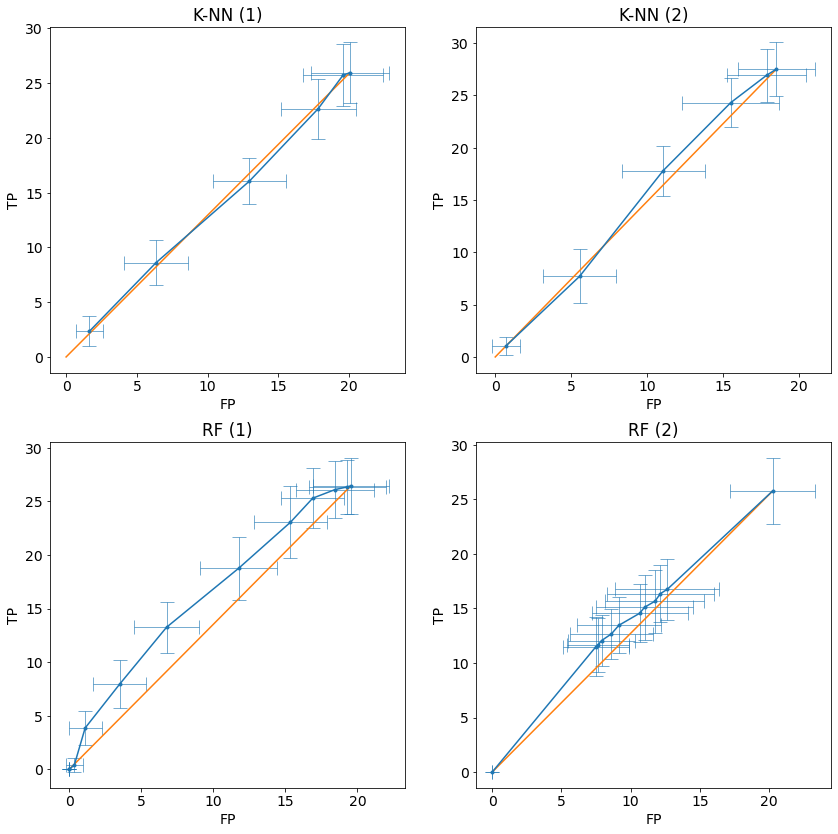

In [40]:
visualise_roc((2, 2, 1), roc_neighbors_1, 'K-NN (1)')
visualise_roc((2, 2, 2), roc_neighbors_2, 'K-NN (2)')
visualise_roc((2, 2, 3), roc_rf_1, 'RF (1)')
visualise_roc((2, 2, 4), roc_rf_2, 'RF (2)')
plt.savefig('./plots/roc.jpg')
plt.show()

### Promising points

In [46]:
roc_neighbors_1_idx = 4
roc_neighbors_2_idx = 3
roc_rf_1_idx = 6
roc_rf_2_idx = 6

points_dict = {
    'K-NN (1)': (roc_neighbors_1, roc_neighbors_1_idx),
    'K-NN (2)': (roc_neighbors_2, roc_neighbors_2_idx),
    'RF (1)': (roc_rf_1, roc_rf_1_idx),
    'RF (2)': (roc_rf_2, roc_rf_2_idx),
}

In [47]:
for name, (data, idx) in points_dict.items():
    print(f'{name:8} [point {idx}]: acc = {data[2][idx][0] * 100:.1f}+-{data[2][idx][1] * 100:.1f} %, \
pre = {data[3][idx][0] * 100:.1f}+-{data[3][idx][1] * 100:.1f} %, \
rec = {data[4][idx][0] * 100:.1f}+-{data[4][idx][1] * 100:.1f} %')

K-NN (1) [point 4]: acc = 48.5+-5.6 %, pre = 58.2+-8.6 %, rec = 33.6+-8.7 %
K-NN (2) [point 3]: acc = 54.9+-5.7 %, pre = 62.0+-5.9 %, rec = 65.4+-10.8 %
RF (1)   [point 6]: acc = 56.6+-5.7 %, pre = 66.6+-8.5 %, rec = 50.4+-9.2 %
RF (2)   [point 6]: acc = 53.4+-7.5 %, pre = 59.9+-11.2 %, rec = 52.3+-8.0 %


### Gini importance

In [48]:
rf_model = RandomForestClassifier(n_estimators=N_TREES)
rf_model.fit(final_X, final_y)

importances = [(rf_model.feature_importances_[i], col) for i, col in enumerate(final_X.columns)]
importances.sort(key=lambda x: x[0], reverse=True)
for imp, col in importances:
    print(f'{(imp * 100):4.1f} % - {col}')

15.4 % - For how many days have you had at least one of these symptoms?
 8.8 % - CITY
 8.0 % - How often are you intentionally avoiding contact with other people?
 5.6 % - Do you personally know anyone in your local community who is ill with a fever and either a cough or difficulty breathing?
 4.5 % - In last 24 Hours When Ever you stepped outside your personal premises, How often have you used mask/face cover.
 4.2 % - GENDER
 3.6 % - In the last 24 hours, have you done any of the following? [None of the above]
 3.4 % - Do you access to Sanitizer/Hand wash at Home
 3.3 % - In the last 24 hours, have you done any of the following? [Gone to Supermarket or Pharmacy]
 2.9 % - Do you access to Sanitizer/Hand wash at workplace
 2.9 % - Have you ever been tested for coronavirus (COVID-19)?
 2.7 % - In the last 24 hours, have you done any of the following? [Have gone to work outside that place where you live]
 2.3 % - In the last 24 hours, have you done any of the following? [You were at Home